Date: 09.04.2023

Author: Reto Hendry

This notebook is to test the reversal of the resampled and flattened np array. It should also mark the most relevant feature. 

## import libs and define functions

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import nibabel as nib
import tqdm

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
from functions.function_plot_3d_array_colored import plot_3d_array_colored
from functions.function_get_feature_positions import get_feature_positions

In [75]:
def unpad_array(padded_array, padding):
    """
    Unpad a padded array.

    Parameters
    ----------
    padded_array : numpy.ndarray
        The padded array.
    padding : list
        A list of tuples containing the padding values for each dimension.

    Returns
    -------
    original_array : numpy.ndarray
        The original array before padding.
    
    """
    # Initialize an empty list to store the slices for each dimension
    slices = []
    
    # Loop through each dimension's padding values
    for pad in padding:
        start = pad[0]

        if pad[1] > 0:
            stop = -pad[1]
        else:
            stop = None  # slice till the end
        
        slices.append(slice(start, stop))
    
    original_array = padded_array[tuple(slices)]

    return original_array

## padding -> reverse

creating 3D plot...


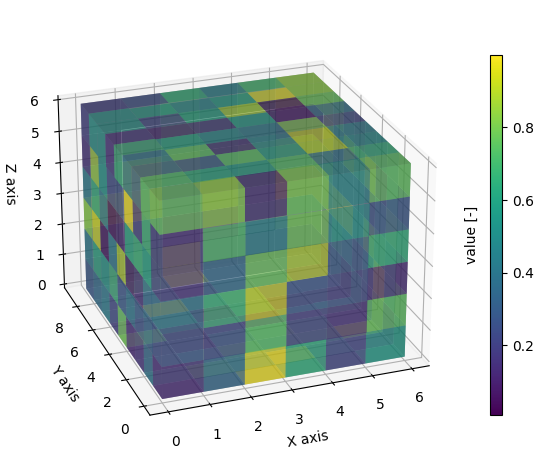

creating 3D plot...


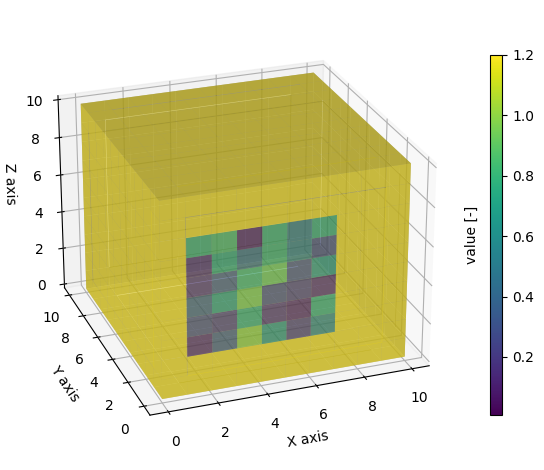

creating 3D plot...


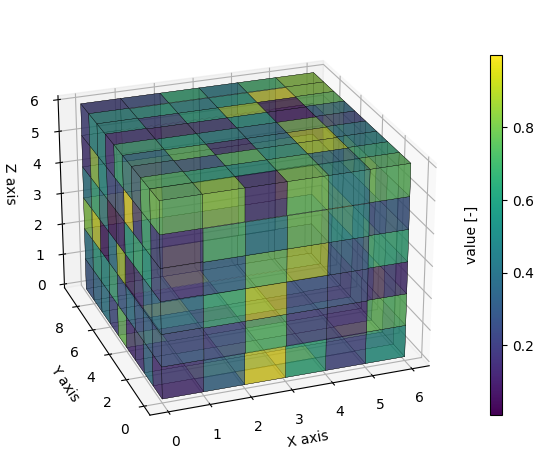

True


In [77]:
# create a padding list
padding = [(1, 3), (0, 1), (2, 2)]

# create a small 3d array of random numbers
small_3d_array = np.random.rand(6, 9, 6)
plot_3d_array_colored(small_3d_array)

# pad the array
padded_small_3d_array = np.pad(small_3d_array, padding, mode="constant", constant_values=1.2)
plot_3d_array_colored(padded_small_3d_array)

# Reverse the padding operation
original_array = unpad_array(padded_small_3d_array, padding)
plot_3d_array_colored(original_array, linewidth_voxel=0.2)

# Check if the arrays are equal
print(np.array_equal(small_3d_array, original_array))

## resampling -> reverse

creating 3D plot...


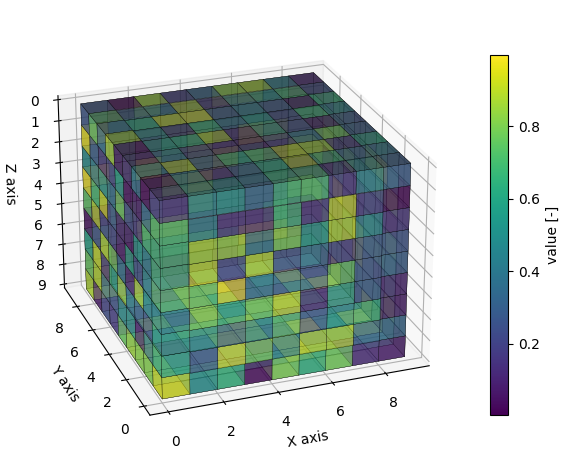

creating 3D plot...


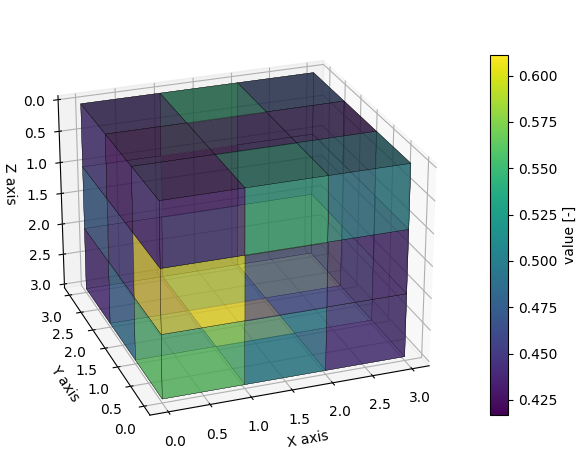

creating 3D plot...


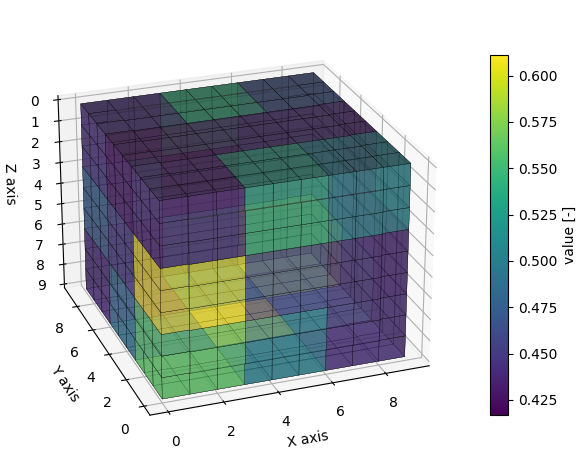

In [132]:
# create a 3d array of random numbers
# the array must be a multiple of the resample_cube since it represents the padded array
resample_cube = (3, 3, 3)
factor = 3
padded_3d_arr = np.random.rand(resample_cube[0] * factor, 
                              resample_cube[1] * factor, 
                              resample_cube[2] * factor)

# plot the array
plot_3d_array_colored(padded_3d_arr, linewidth_voxel=0.2)

######################
# resample the array (code from function_resample_4d_array.py)
small_3d_array_size = tuple(int(padded_3d_arr.shape[i] / resample_cube[i]) for i in range(3))

strides = tuple(
    padded_3d_arr.strides[k] * resample_cube[k] for k in range(3)
) + padded_3d_arr.strides
window_view = np.lib.stride_tricks.as_strided(
    padded_3d_arr, shape=small_3d_array_size + resample_cube, strides=strides
)

small_3d_array = np.mean(window_view, axis=(-3, -2, -1))

# plot the array
plot_3d_array_colored(small_3d_array, linewidth_voxel=0.2)

######################
# reverse the resampling operation

# Expand the smaller array back to the original shape
expanded_3d_array = (small_3d_array
                     .repeat(resample_cube[0], axis=0)
                     .repeat(resample_cube[1], axis=1)
                     .repeat(resample_cube[2], axis=2)
)

# plot the array
plot_3d_array_colored(expanded_3d_array, linewidth_voxel=0.2)


## resampling, reshaping -> reverse

creating 3D plot...


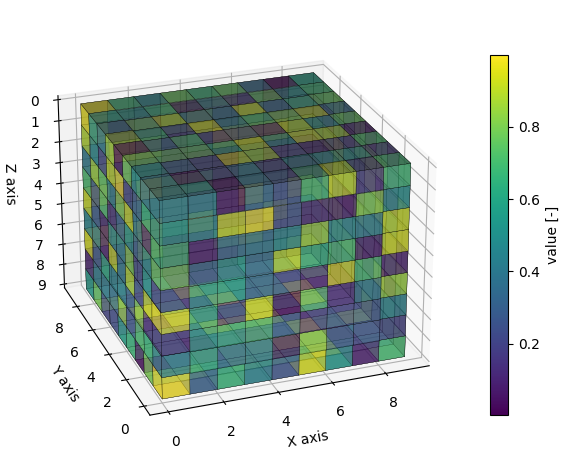

creating 3D plot...


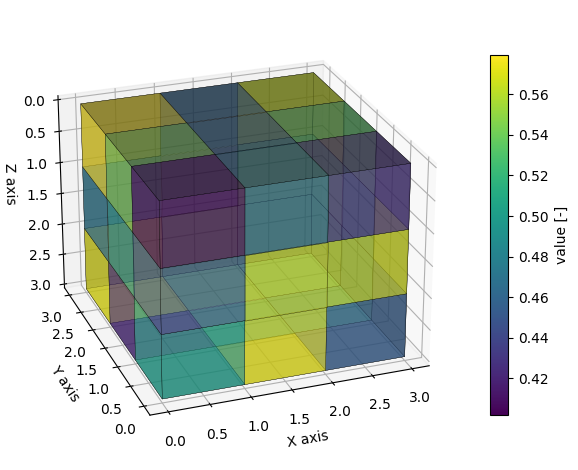

creating 3D plot...


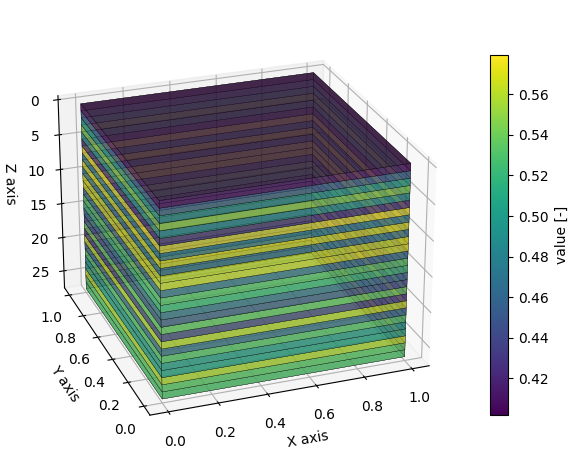

creating 3D plot...


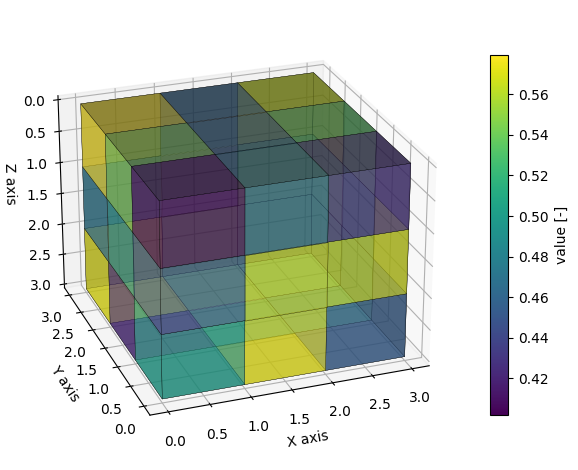

creating 3D plot...


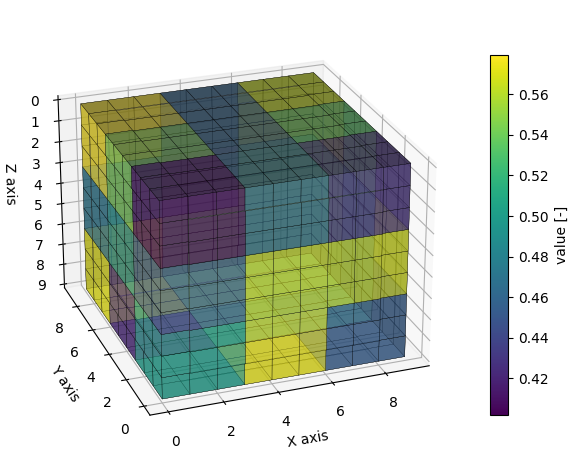

In [133]:
# create a 3d array of random numbers
# the array must be a multiple of the resample_cube since it represents the padded array
resample_cube = (3, 3, 3)
factor = 3
padded_3d_arr = np.random.rand(resample_cube[0] * factor, 
                              resample_cube[1] * factor, 
                              resample_cube[2] * factor)

# plot the array
plot_3d_array_colored(padded_3d_arr, linewidth_voxel=0.2)

######################
# resample the array (code from function_resample_4d_array.py)
small_3d_array_size = tuple(int(padded_3d_arr.shape[i] / resample_cube[i]) for i in range(3))

strides = tuple(
    padded_3d_arr.strides[k] * resample_cube[k] for k in range(3)
) + padded_3d_arr.strides
window_view = np.lib.stride_tricks.as_strided(
    padded_3d_arr, shape=small_3d_array_size + resample_cube, strides=strides
)

small_3d_array = np.mean(window_view, axis=(-3, -2, -1))

# plot the array
plot_3d_array_colored(small_3d_array, linewidth_voxel=0.2)

######################
# reshape the array (flatten)
flattened_array = small_3d_array.reshape((1, 1, -1))

# plot the array
plot_3d_array_colored(flattened_array, linewidth_voxel=0.2)

######################
# reverse the reshape (unflatten)
unflattened_array = flattened_array.reshape(small_3d_array_size)

# plot the array
plot_3d_array_colored(unflattened_array, linewidth_voxel=0.2)

######################
# reverse the resampling operation

# Expand the smaller array back to the original shape
expanded_3d_array = (unflattened_array
                     .repeat(resample_cube[0], axis=0)
                     .repeat(resample_cube[1], axis=1)
                     .repeat(resample_cube[2], axis=2)
)

# plot the array
plot_3d_array_colored(expanded_3d_array, linewidth_voxel=0.2)

## padding, resampling, reshaping -> reverse

creating 3D plot...


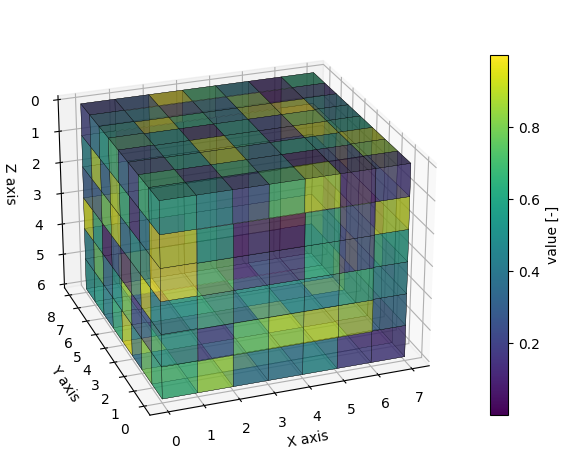

creating 3D plot...


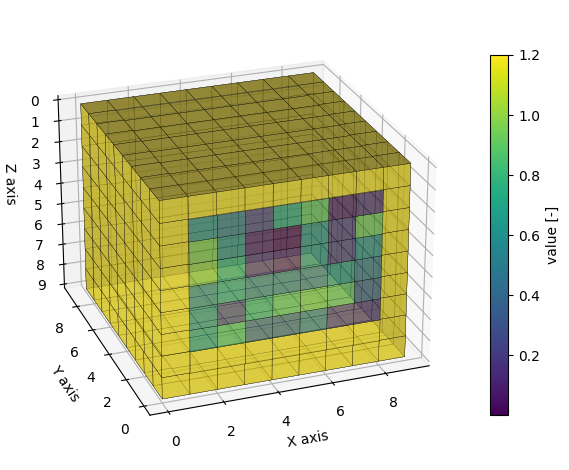

creating 3D plot...


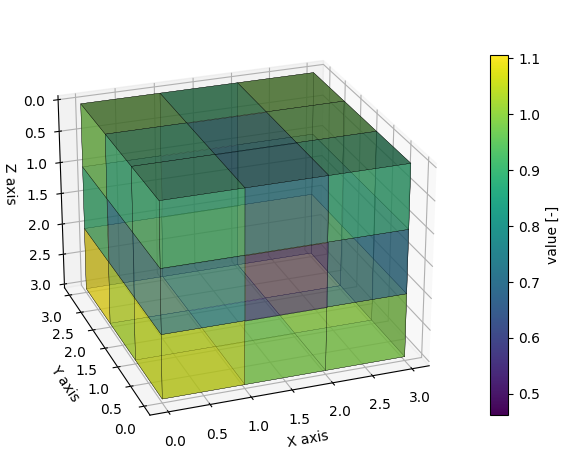

creating 3D plot...


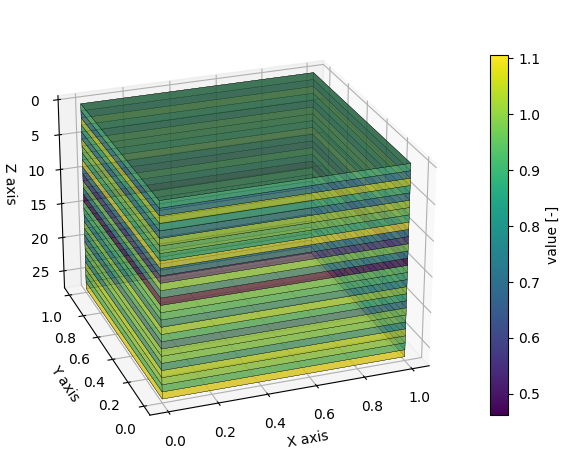

creating 3D plot...


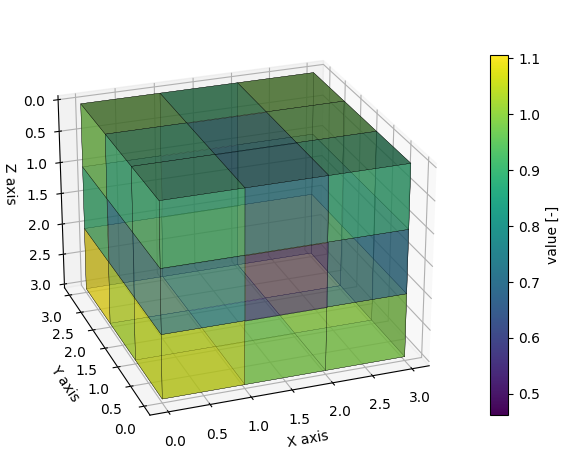

creating 3D plot...


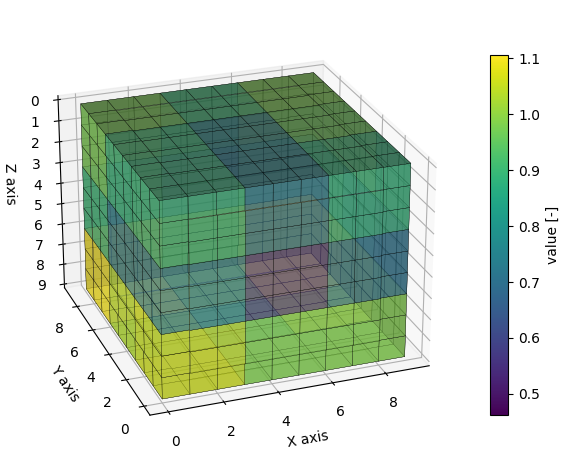

creating 3D plot...


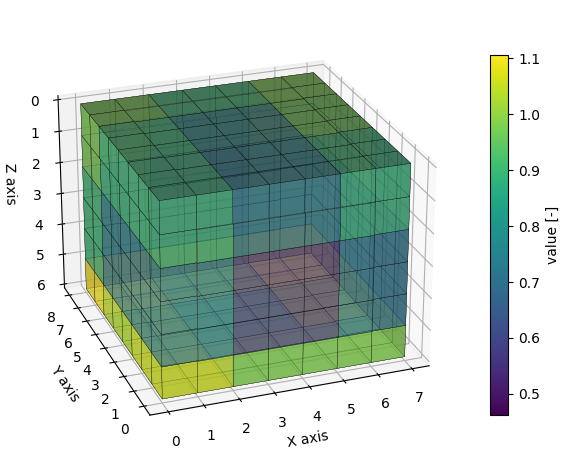

In [134]:
s = 3
resample_cube = (s, s, s)
padding = [(1, 1), (0, 1), (1, 2)]

# create a small 3d array of random numbers
first_small_3d_array = np.random.rand(7, 8, 6)
plot_3d_array_colored(first_small_3d_array, linewidth_voxel=0.2)

######################
# pad the array
padded_3d_arr = np.pad(first_small_3d_array, padding, mode="constant", constant_values=1.2)
plot_3d_array_colored(padded_3d_arr, linewidth_voxel=0.2)

######################
# resample the array (code from function_resample_4d_array.py)
small_3d_array_size = tuple(int(padded_3d_arr.shape[i] / resample_cube[i]) for i in range(3))

strides = tuple(
    padded_3d_arr.strides[k] * resample_cube[k] for k in range(3)
) + padded_3d_arr.strides
window_view = np.lib.stride_tricks.as_strided(
    padded_3d_arr, shape=small_3d_array_size + resample_cube, strides=strides
)

small_3d_array = np.mean(window_view, axis=(-3, -2, -1))
plot_3d_array_colored(small_3d_array, linewidth_voxel=0.2)

######################
# reshape the array (flatten)
flattened_array = small_3d_array.reshape((1, 1, -1))
plot_3d_array_colored(flattened_array, linewidth_voxel=0.2)

######################
# reverse the reshape (unflatten)
unflattened_array = flattened_array.reshape(small_3d_array_size)
plot_3d_array_colored(unflattened_array, linewidth_voxel=0.2)

######################
# reverse the resampling operation

# Expand the smaller array back to the original shape
expanded_3d_array = (unflattened_array
                     .repeat(resample_cube[0], axis=0)
                     .repeat(resample_cube[1], axis=1)
                     .repeat(resample_cube[2], axis=2)
)
plot_3d_array_colored(expanded_3d_array, linewidth_voxel=0.2)

######################
# Reverse the padding operation
original_array = unpad_array(expanded_3d_array, padding)
plot_3d_array_colored(original_array, linewidth_voxel=0.2)

## + visualize features

creating 3D plot...


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


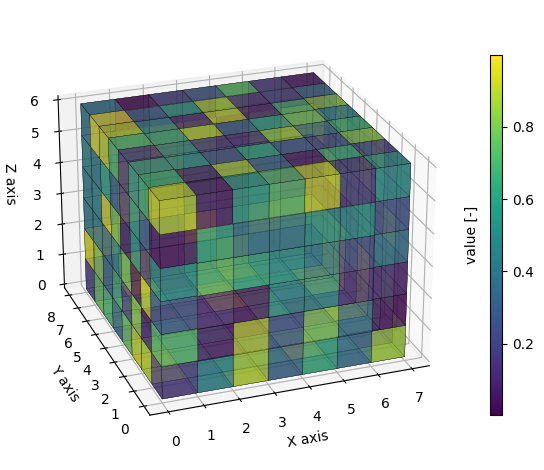

creating 3D plot...


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


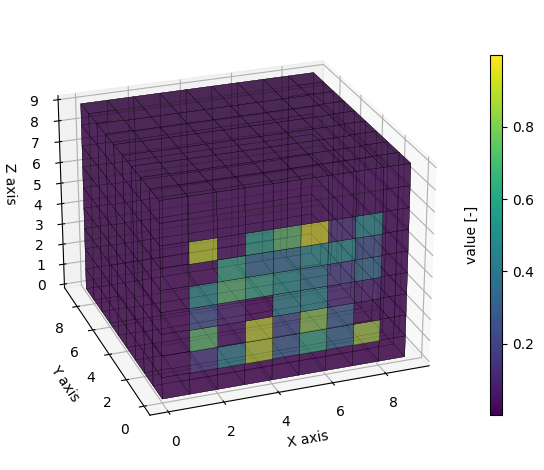

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


creating 3D plot...


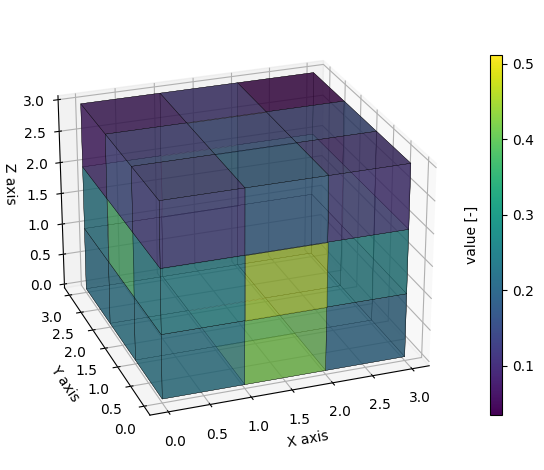

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


creating 3D plot...


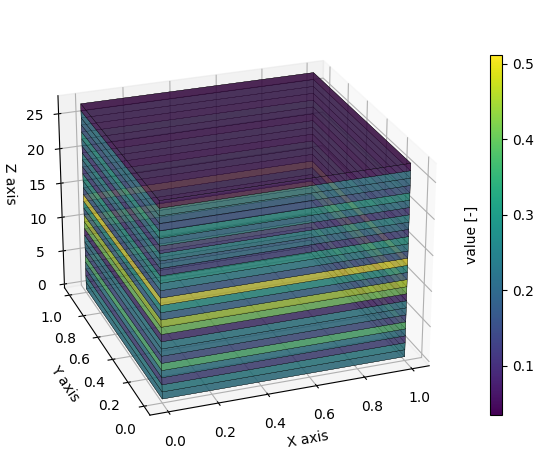

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


creating 3D plot...


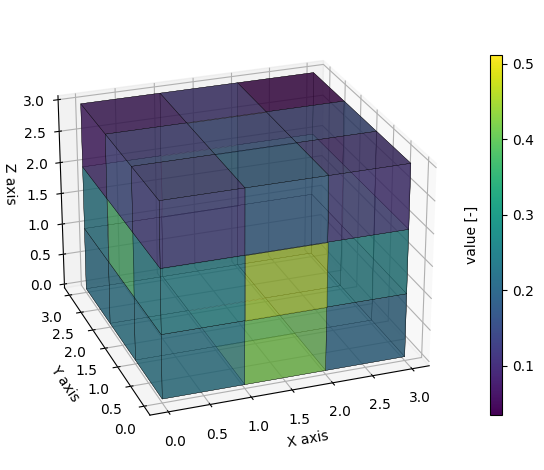

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


(3, 3, 3)
[(0, 0, 2), (0, 2, 2), (2, 1, 0)]
[[0 0 2]
 [0 2 2]
 [2 1 0]]
creating 3D plot...


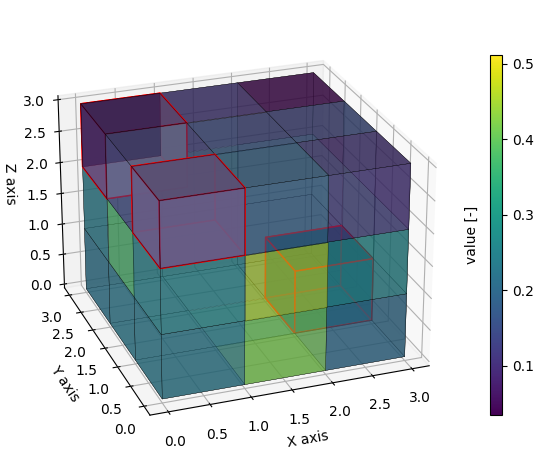

creating 3D plot...


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


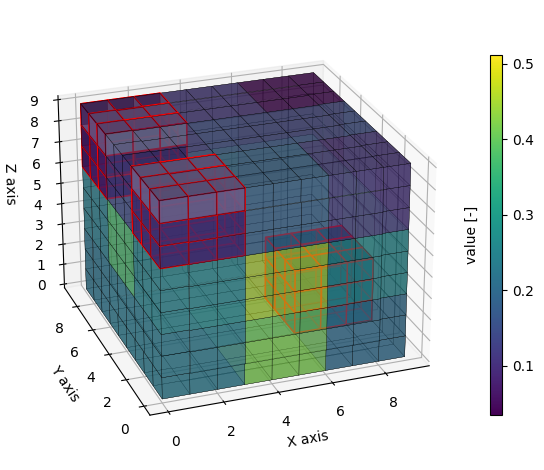

creating 3D plot...


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


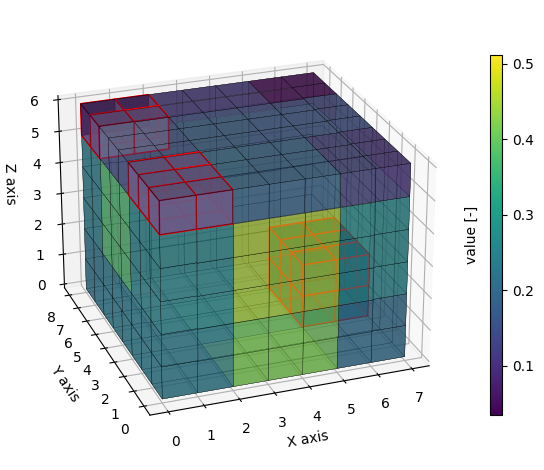

In [93]:
s = 3
resample_cube = (s, s, s)
padding = [(1, 1), (0, 1), (1, 2)]
np.random.seed(12)

# create a small 3d array of random numbers
first_small_3d_array = np.random.rand(7, 8, 6)
plot_3d_array_colored(first_small_3d_array, linewidth_voxel=0.2, plot_name="../figures/visualize_steps_01")

######################
# pad the array
padded_3d_arr = np.pad(first_small_3d_array, padding, mode="constant", constant_values=0.01)
plot_3d_array_colored(padded_3d_arr, linewidth_voxel=0.2, plot_name="../figures/visualize_steps_02")

######################
# resample the array (code from function_resample_4d_array.py)
small_3d_array_size = tuple(int(padded_3d_arr.shape[i] / resample_cube[i]) for i in range(3))

strides = tuple(
    padded_3d_arr.strides[k] * resample_cube[k] for k in range(3)
) + padded_3d_arr.strides
window_view = np.lib.stride_tricks.as_strided(
    padded_3d_arr, shape=small_3d_array_size + resample_cube, strides=strides
)

small_3d_array = np.mean(window_view, axis=(-3, -2, -1))
plot_3d_array_colored(small_3d_array, linewidth_voxel=0.2, plot_name="../figures/visualize_steps_03")

######################
# reshape the array (flatten)
flattened_array = small_3d_array.reshape((1, 1, -1))
plot_3d_array_colored(flattened_array, linewidth_voxel=0.2, plot_name="../figures/visualize_steps_04")

######################
# reverse the reshape (unflatten)
unflattened_array = flattened_array.reshape(small_3d_array_size)
plot_3d_array_colored(unflattened_array, linewidth_voxel=0.2, plot_name="../figures/visualize_steps_05")

######################
# Find the indices of the important elements in the unflattened array 
# based on the flattened array
marker_array = unflattened_array.copy()
important_indices_flattened = [2, 8, 21]
important_indices_3d = [np.unravel_index(index, unflattened_array.shape) for index in important_indices_flattened]
print(unflattened_array.shape)
print(important_indices_3d)
for indx in important_indices_3d:
    marker_array[indx] = True
indices = np.argwhere(marker_array == True)
print(indices)
plot_3d_array_colored(unflattened_array, marked_indices=indices, linewidth_voxel=0.2, plot_name="../figures/visualize_steps_06")

######################
# reverse the resampling operation

# Expand the smaller array back to the original shape
expanded_3d_array = (unflattened_array
                     .repeat(resample_cube[0], axis=0)
                     .repeat(resample_cube[1], axis=1)
                     .repeat(resample_cube[2], axis=2)
)
expanded_marker_array = (marker_array
                        .repeat(resample_cube[0], axis=0)
                        .repeat(resample_cube[1], axis=1)
                        .repeat(resample_cube[2], axis=2)
)
plot_3d_array_colored(expanded_3d_array, np.argwhere(expanded_marker_array == True), linewidth_voxel=0.2, plot_name="../figures/visualize_steps_07")

######################
# Reverse the padding operation
original_array = unpad_array(expanded_3d_array, padding)
original_marker_array = unpad_array(expanded_marker_array, padding)
plot_3d_array_colored(original_array, np.argwhere(original_marker_array == True), linewidth_voxel=0.2, plot_name="../figures/visualize_steps_08")

## Test on 91 x 109 x 91 array

creating 3D plot...


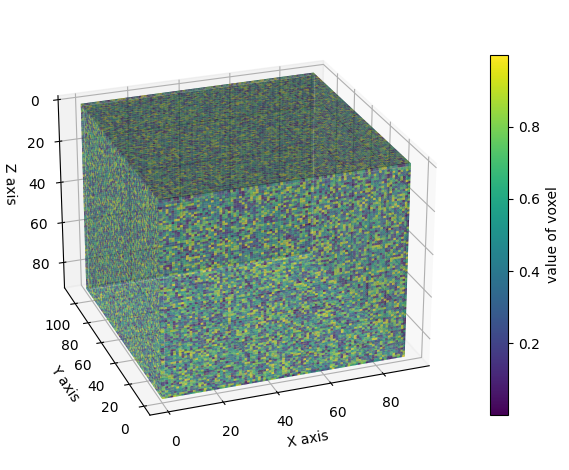

creating 3D plot...


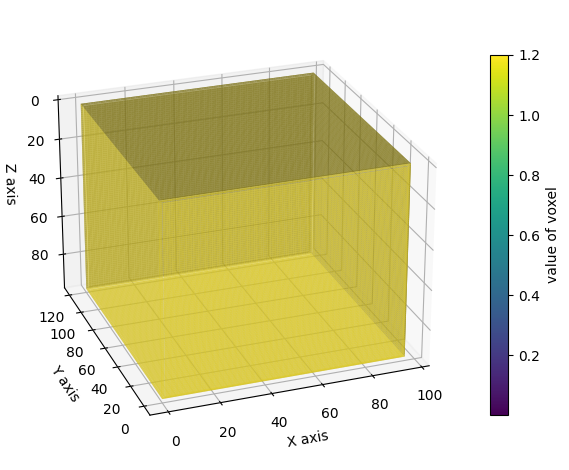

creating 3D plot...


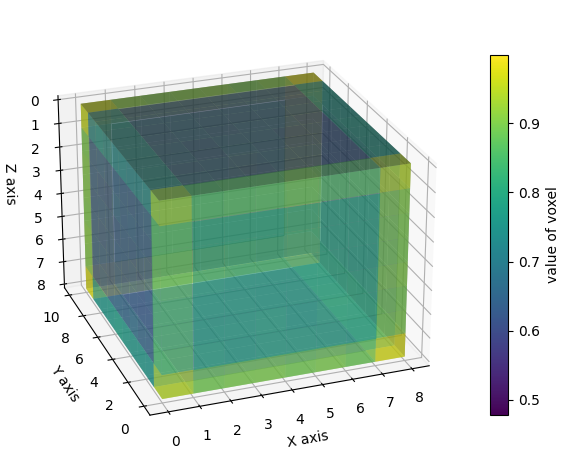

creating 3D plot...


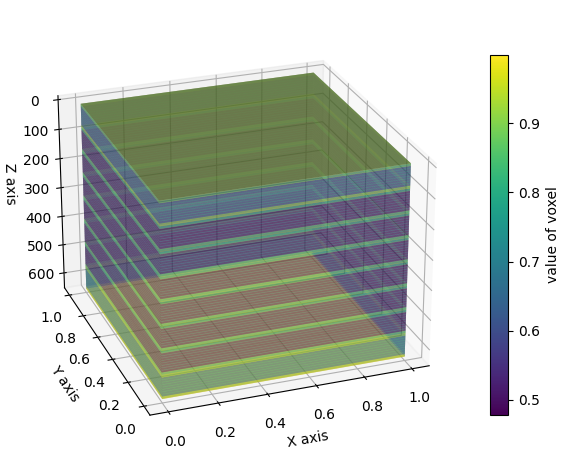

creating 3D plot...


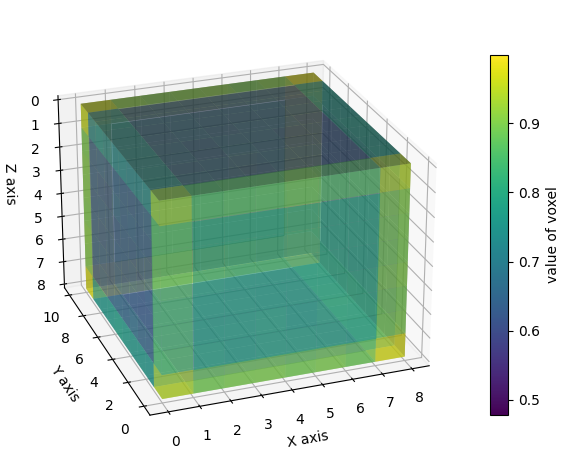

(8, 10, 8)
[(4, 5, 3), (2, 4, 4), (2, 5, 5), (4, 4, 5), (5, 4, 5), (3, 2, 3), (2, 6, 1), (3, 4, 5), (3, 4, 1), (1, 5, 4)]
[[1 5 4]
 [2 4 4]
 [2 5 5]
 [2 6 1]
 [3 2 3]
 [3 4 1]
 [3 4 5]
 [4 4 5]
 [4 5 3]
 [5 4 5]]
creating 3D plot...


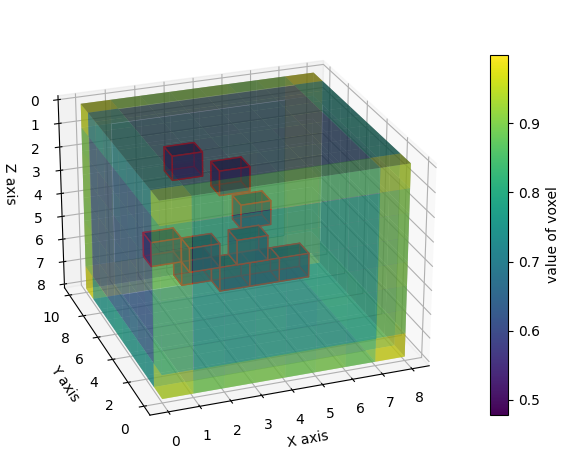

creating 3D plot...


In [136]:
# example on shape of actual MVPA data

s = 12
resample_cube = (s, s, s)
padding = [(2, 3), (5, 6), (2, 3)]

# create a small 3d array of random numbers
first_small_3d_array = np.random.rand(91, 109, 91)
plot_3d_array_colored(first_small_3d_array)

######################
# pad the array
padded_3d_arr = np.pad(first_small_3d_array, padding, mode="constant", constant_values=1.2)
plot_3d_array_colored(padded_3d_arr)

######################
# resample the array (code from function_resample_4d_array.py)
small_3d_array_size = tuple(int(padded_3d_arr.shape[i] / resample_cube[i]) for i in range(3))

strides = tuple(
    padded_3d_arr.strides[k] * resample_cube[k] for k in range(3)
) + padded_3d_arr.strides
window_view = np.lib.stride_tricks.as_strided(
    padded_3d_arr, shape=small_3d_array_size + resample_cube, strides=strides
)

small_3d_array = np.mean(window_view, axis=(-3, -2, -1))
plot_3d_array_colored(small_3d_array)

######################
# reshape the array (flatten)
flattened_array = small_3d_array.reshape((1, 1, -1))
plot_3d_array_colored(flattened_array)

######################
# reverse the reshape (unflatten)
unflattened_array = flattened_array.reshape(small_3d_array_size)
plot_3d_array_colored(unflattened_array)

######################
# Find the indices of the important elements in the unflattened array 
# based on the flattened array
marker_array = unflattened_array.copy()
important_indices_flattened = [363, 196, 205, 357, 437, 259, 209, 277, 273, 124]
important_indices_3d = [np.unravel_index(index, unflattened_array.shape) for index in important_indices_flattened]
print(unflattened_array.shape)
print(important_indices_3d)
for indx in important_indices_3d:
    marker_array[indx] = True
indices = np.argwhere(marker_array == True)
print(indices)
plot_3d_array_colored(unflattened_array, marked_indices=indices)

######################
# reverse the resampling operation

# Expand the smaller array back to the original shape
expanded_3d_array = (unflattened_array
                     .repeat(resample_cube[0], axis=0)
                     .repeat(resample_cube[1], axis=1)
                     .repeat(resample_cube[2], axis=2)
)
expanded_marker_array = (marker_array
                        .repeat(resample_cube[0], axis=0)
                        .repeat(resample_cube[1], axis=1)
                        .repeat(resample_cube[2], axis=2)
)
plot_3d_array_colored(expanded_3d_array, np.argwhere(expanded_marker_array == True))

######################
# Reverse the padding operation
original_array = unpad_array(expanded_3d_array, padding)
original_marker_array = unpad_array(expanded_marker_array, padding)
plot_3d_array_colored(original_array, np.argwhere(original_marker_array == True))

## Create markers and NIfTY files

done with get_feature_positions
creating 3D plot...


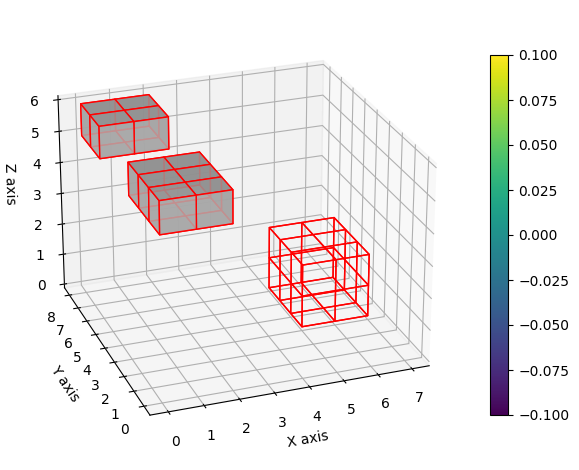

In [ ]:
marker, original_marker_array_shape = get_feature_positions(
    [2, 8, 21], 
    [(1, 1), (0, 1), (1, 2)],
    3,
    (3, 3, 3)
)

array = np.zeros((7, 8, 6))
plot_3d_array_colored(array, marker)